# Inicialización

In [58]:
# funciones
import matplotlib.pyplot as plt
import numpy as np
from fun_gilles import *

def concentration_time(times, abundances, V, species):
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    plt.figure()
    plt.grid(True, linestyle='--', alpha=0.3)
    for i in range(len(species)):
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Concentration")
    plt.show()

def volume_time(times, V):
    plt.figure()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.plot(times, V, color= plt.cm.coolwarm(0))
    plt.xlabel("Time")
    plt.ylabel("Volume")
    plt.show()

def abundances_times(times, abundances, species):
    plt.figure()
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
    
    for i in range(len(species)):
        plt.plot(times, abundances[:, i], label=species[i], color=colors[i], alpha=0.9)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xlabel("Time")
    plt.ylabel("Abundances")
    plt.legend()
    plt.title(f"Time evolution: {np.shape(times)[0]-1} iterations, k= {k}")
    plt.show()

# Pruebas con el sistema XYC

## Ejemplo 1

In [112]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,1]+[0.1]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [200,0,0,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 15000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

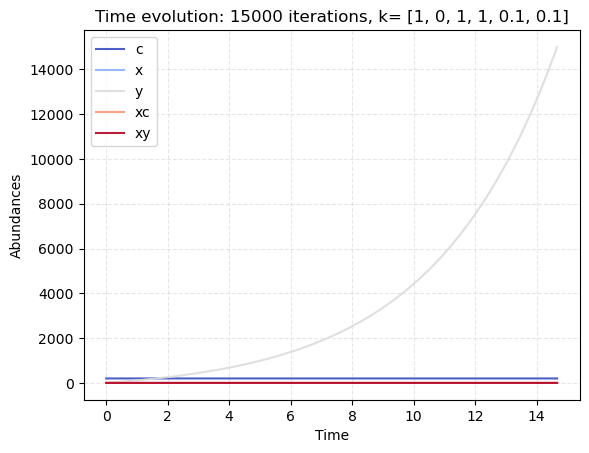

In [113]:
abundances_times(times, abundances, species)

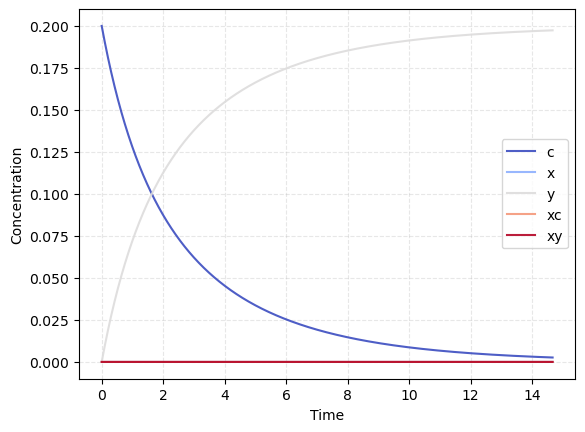

In [114]:
concentration_time(times, abundances, V, species)

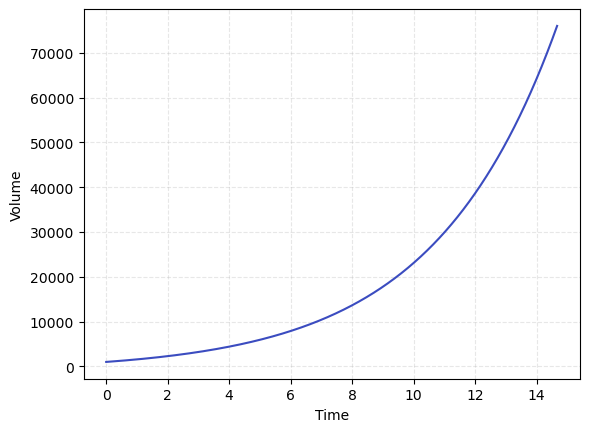

In [115]:
volume_time(times, V)

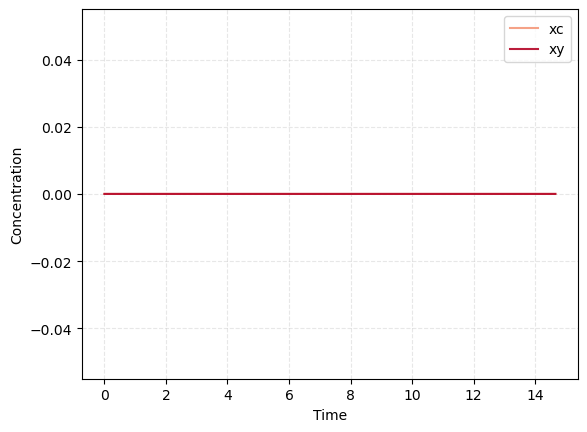

In [116]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    if species[i] == 'xc' or species[i] == 'xy':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

## Ejemplo 2

In [ ]:
# Initialization:
file = "reactions_XYC_food.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1,0,1,0]+ [1e-2]*2 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [100,0,0,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 10000 # In the deterministic mode n_iterations refers to the t_end


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

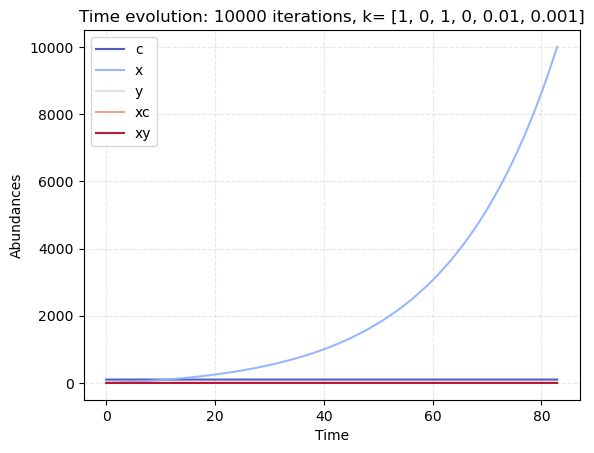

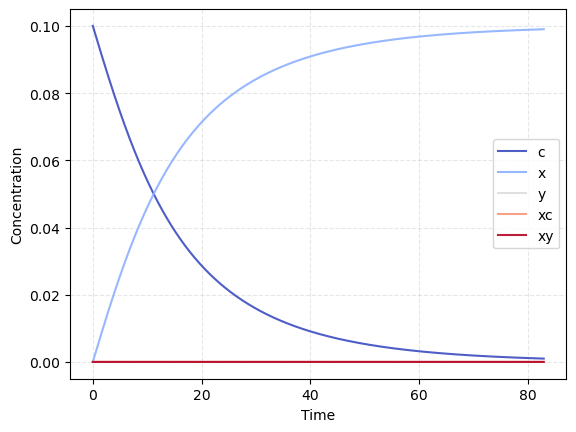

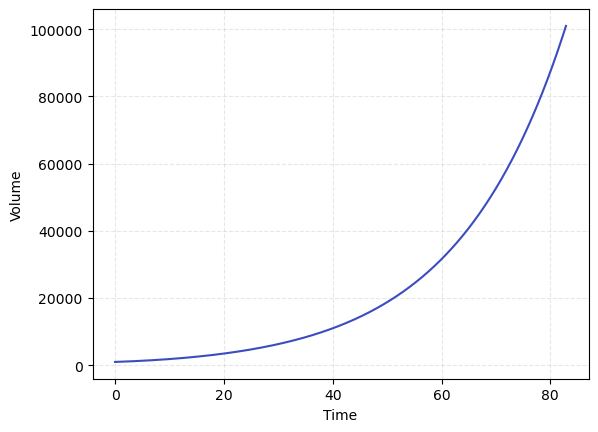

In [118]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

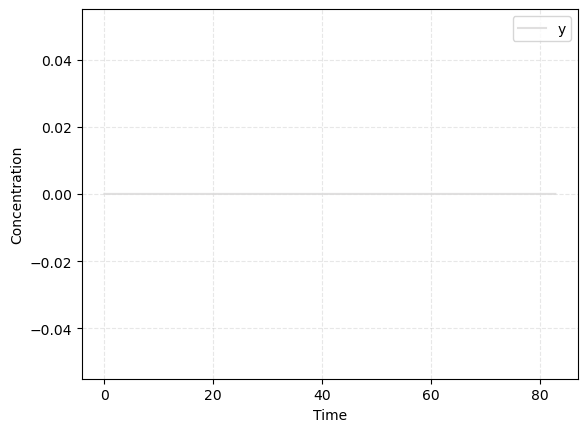

In [120]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(species)))
plt.figure()
plt.grid(True, linestyle='--', alpha=0.3)
for i in range(len(species)):
    # if species[i] == 'xc' or species[i] == 'xy':
    if species[i] == 'y':
        plt.plot(times, abundances[:, i]/V, label=species[i], color=colors[i], alpha=0.9)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.show()

# Pruebas con el sistema C

$\longrightarrow C_1$

$C_1 + C_2 \longleftrightarrow C_3$

$C_1 + C_3 \longleftrightarrow C_4$

$2C_2 \longleftrightarrow C_4$


## Ejemplo 1

In [5]:
# Initialization:
file = "reactions_C.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1e-2]+[1]*6 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

TypeError: 'bool' object is not callable

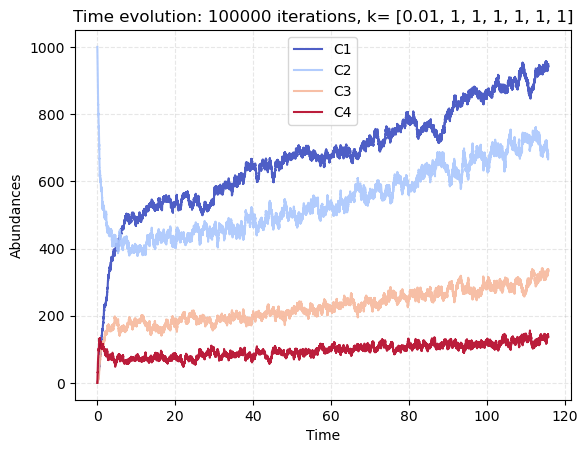

In [135]:
abundances_times(times, abundances, species)

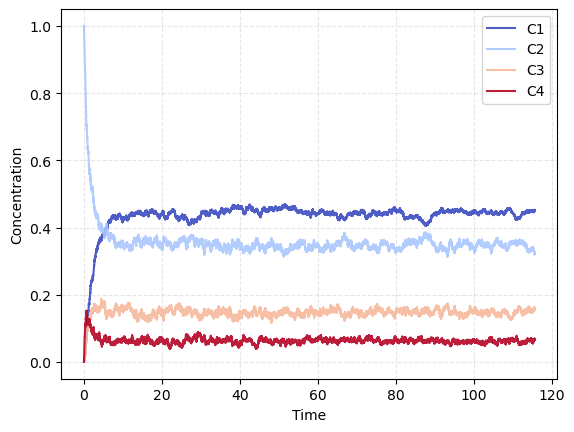

In [136]:
concentration_time(times, abundances, V, species)

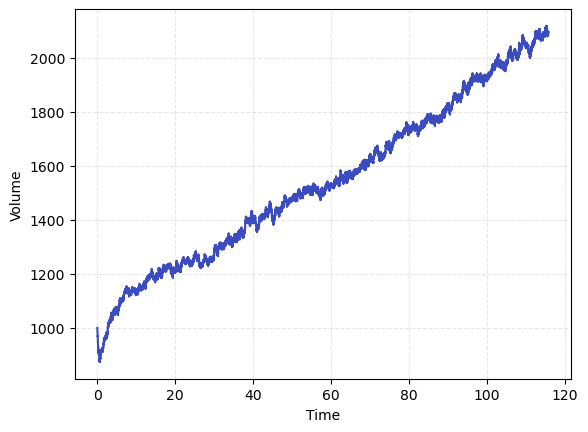

In [137]:
volume_time(times, V)

### Zoom caida vol

In [141]:
# Reaction constants:
k = [1e-2]+[1]*6 # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number
n_iterations= 1000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

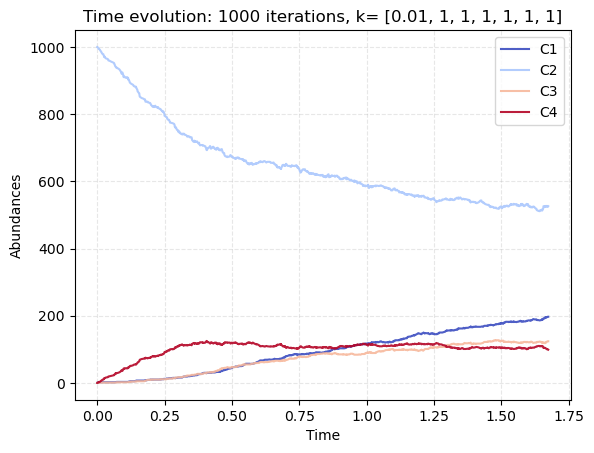

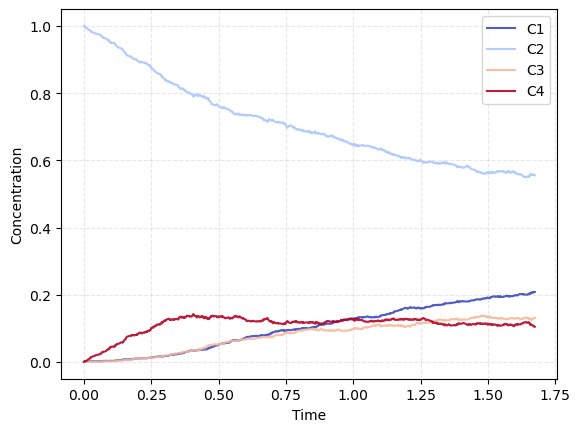

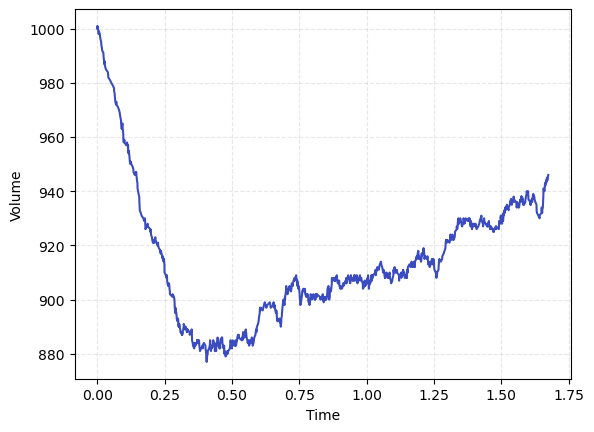

In [142]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Reacción 2 C2 --> C4 eliminada
Es raro que el volumen caiga al principio, pero supongo que es porque hay una caída de la abundancia total (el volumen se calcula para mantener la relacion abundancia/volumen constante). Esta caída se debe a la reacción c2+c2 --> c4. Para comprobarlo ponemos esa reacción a 0 y volvemos a representar el volumen, donde esperaríamos no tener esa caída

In [139]:
file = "reactions_C.txt" # M reactions
method = "Gillespie" # Gillespie or Deterministic

# Reaction constants:
k = [1e-2]+[1]*5 + [0] # len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
reactions = read_file(file)
species = obtain_species(reactions)
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

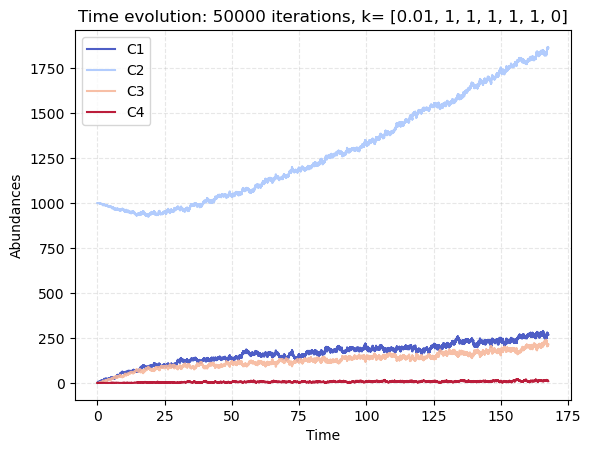

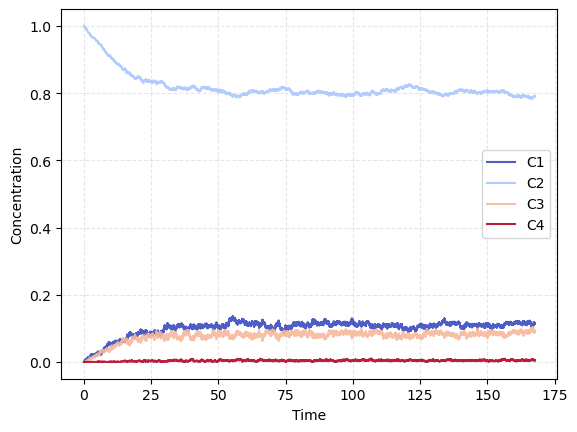

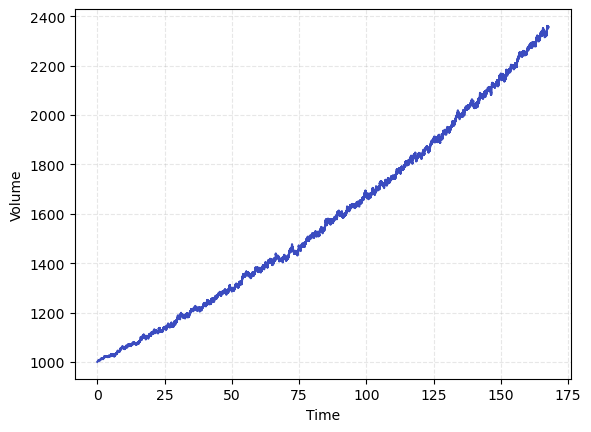

In [140]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 2

Igual que el anterior, pero voy a poner a 0 todas las reacciones inversas menos la última

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,1]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

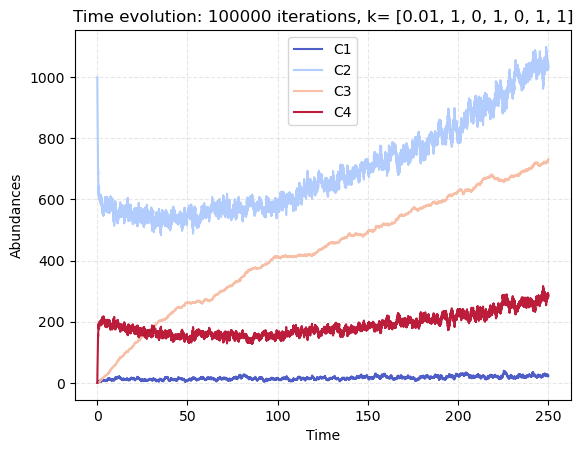

In [ ]:
abundances_times(times, abundances, species)

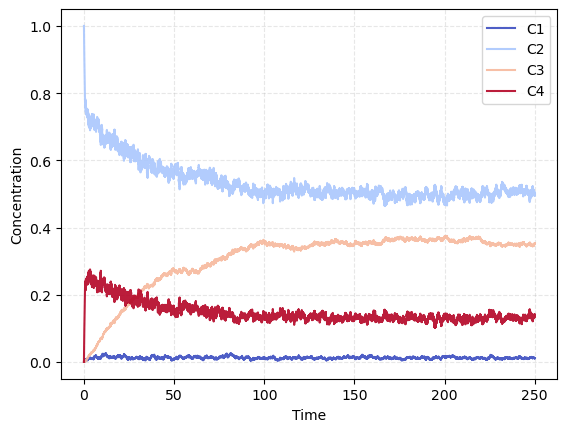

In [ ]:
concentration_time(times, abundances, V, species)

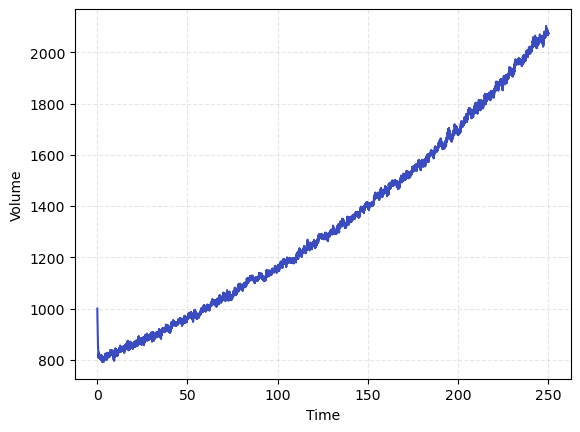

In [ ]:
volume_time(times, V)

## Ejemplo 3

Al poner una k de aparición de $C1$ muy baja, esperamos que el sistema tarde más en "empezar", por lo que el volumen caerá más al principio que en los casos anteriores

In [ ]:
# Reaction constants:
k = [1e-10]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 80000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)

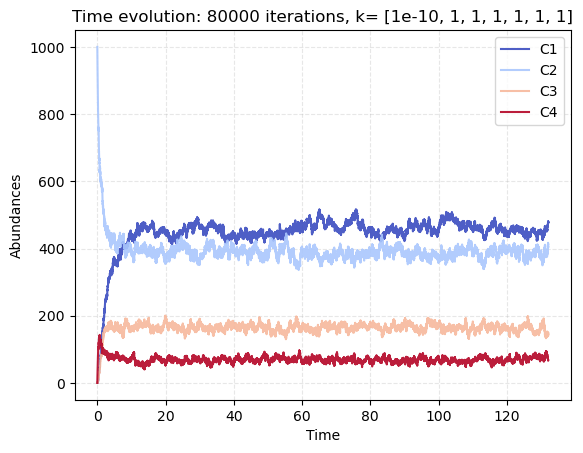

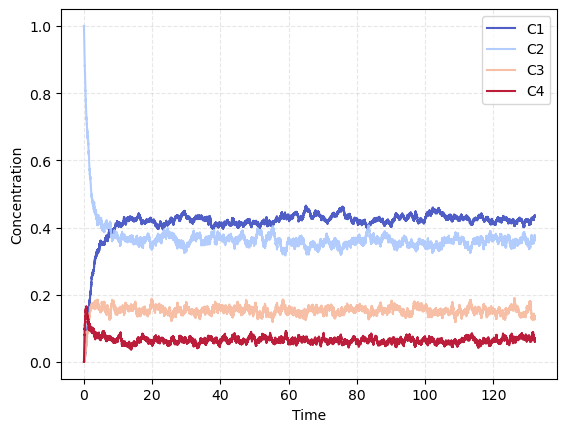

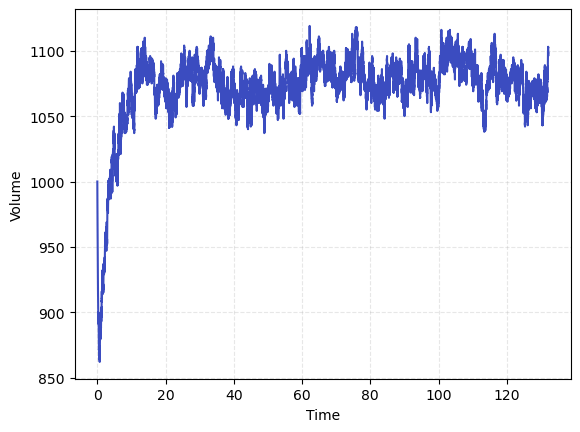

In [ ]:
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 4

Voy a probar a poner una k de entrada de C1 muy alta

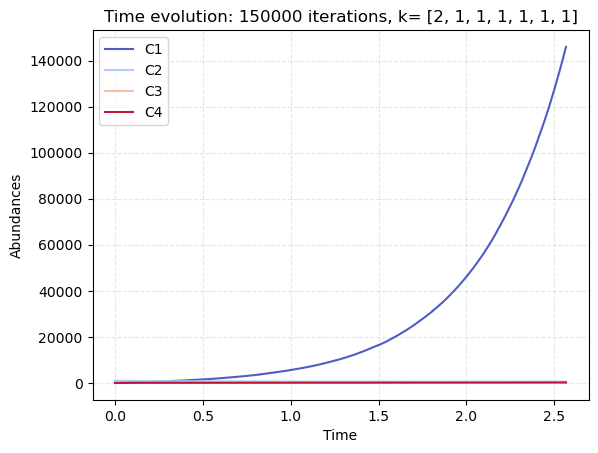

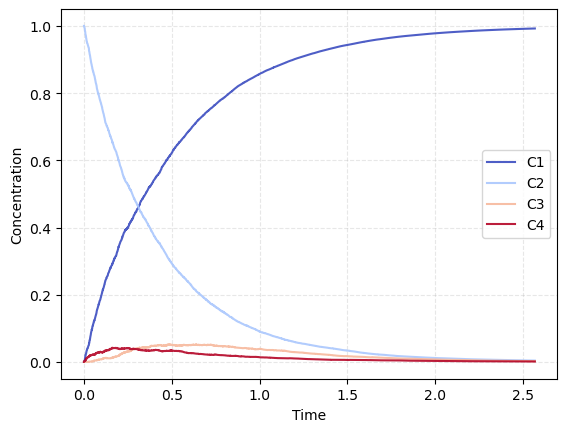

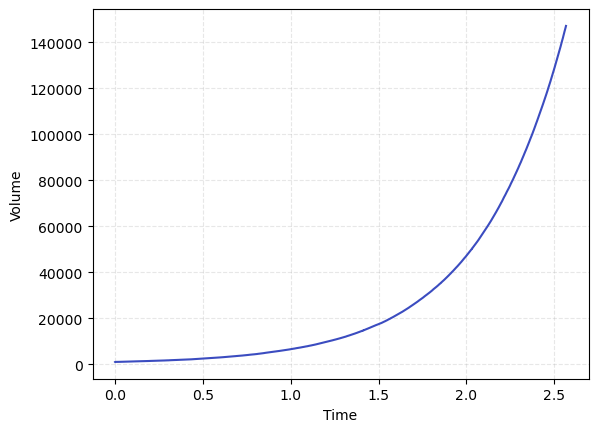

In [ ]:
# Reaction constants:
k = [2]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 150000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)


## Ejemplo 5

Qué pasa si en vez de tener C2 de base se tiene C4 (se puede obtener el resto de especies a partir de C4 y C1)

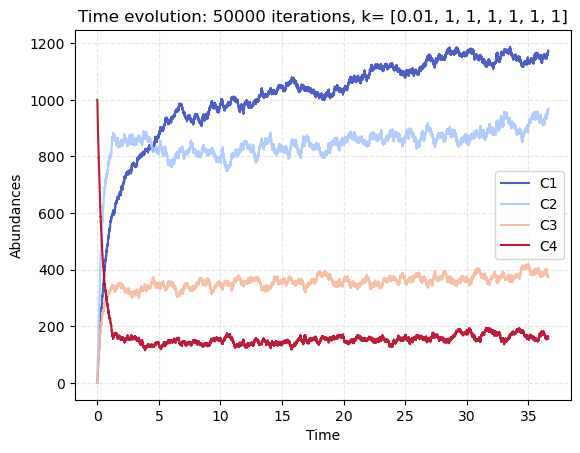

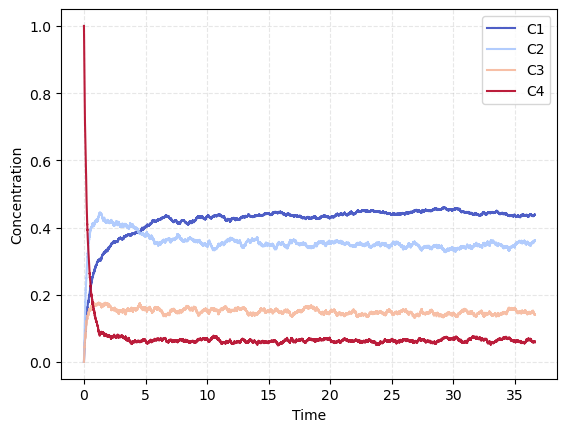

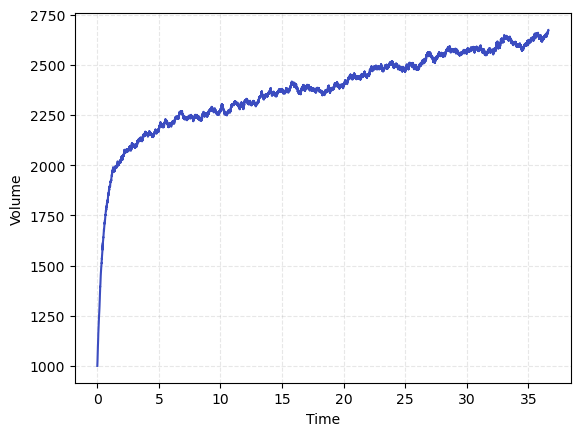

In [ ]:
# Reaction constants:
k = [1e-2]+[1]*6# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,0,0,1000] # initial molecules number

# obtener reacciones y especies:
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 6

Para ver si al poner una k alta de 2C2 --> C4 aumenta el tiempo de caida

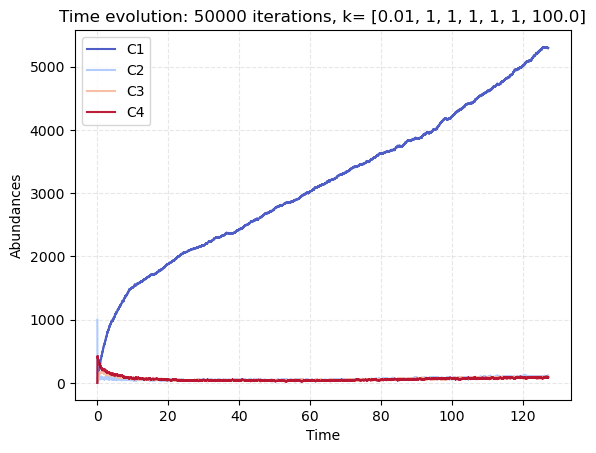

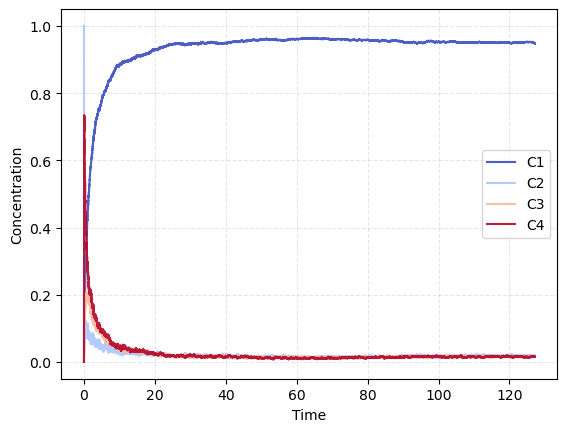

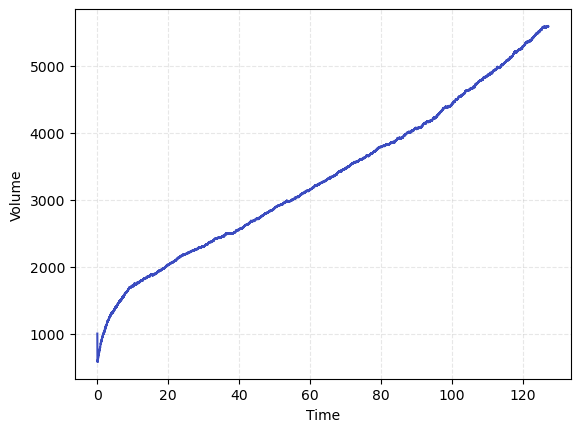

In [ ]:
# Reaction constants:
k = [1e-2]+[1]*5 +[1e2]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 50000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Ejemplo 6 pero con menos iteraciones para que se vea bien

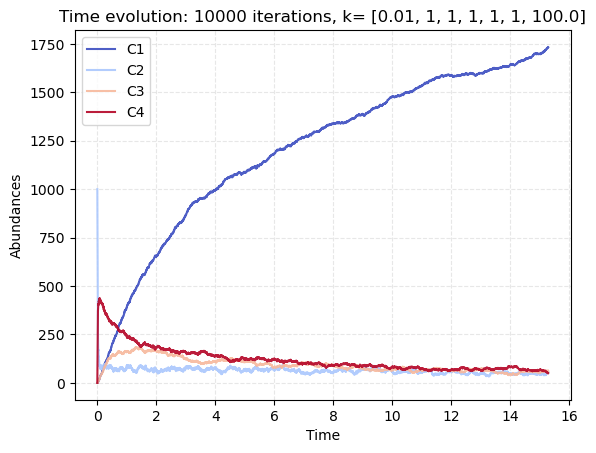

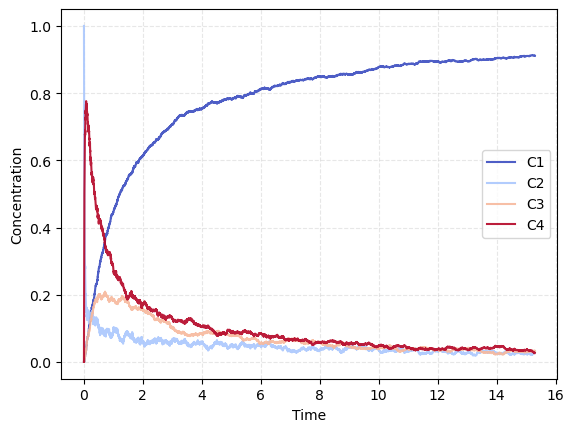

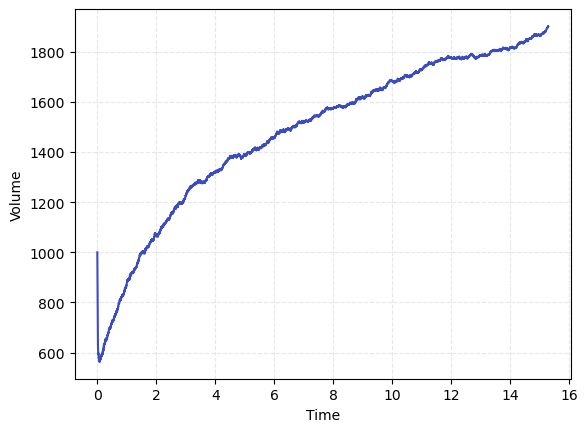

In [132]:
# Reaction constants:
k = [1e-2]+[1]*5 +[1e2]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 10000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 7

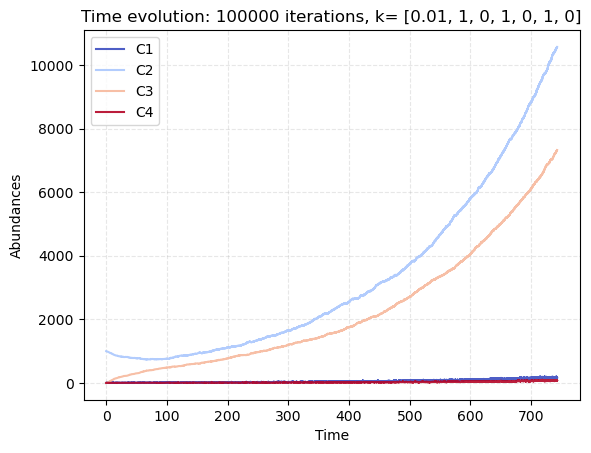

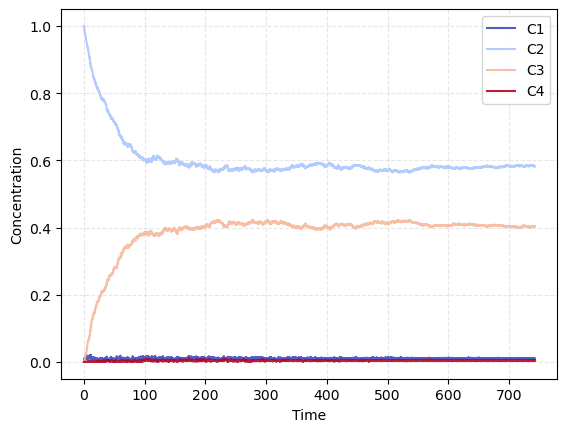

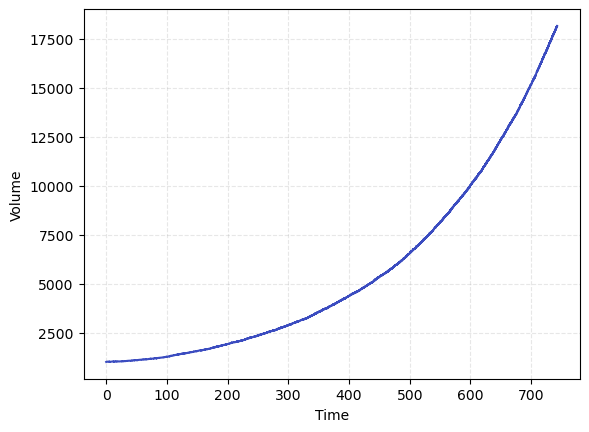

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

### Cambiando la especie con la que se empieza

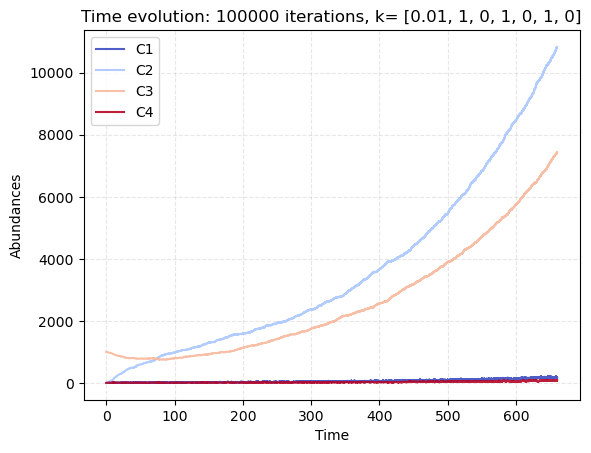

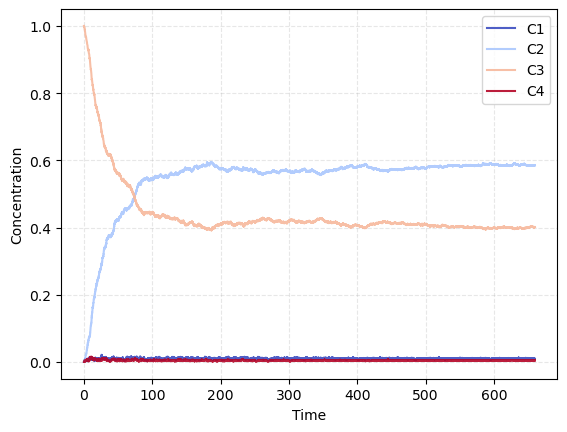

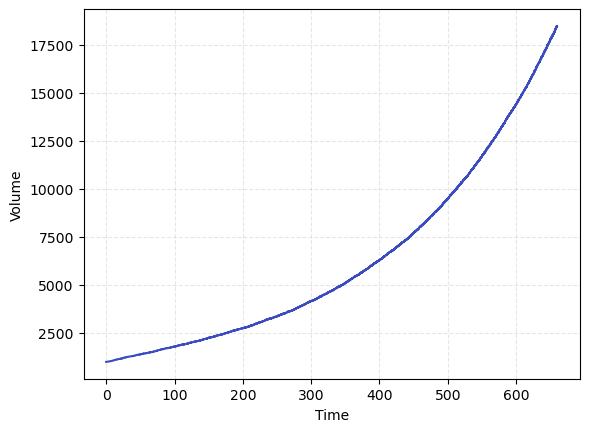

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,0,1000,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

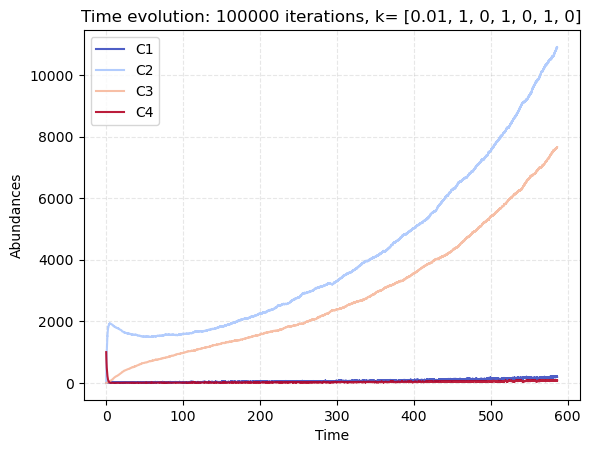

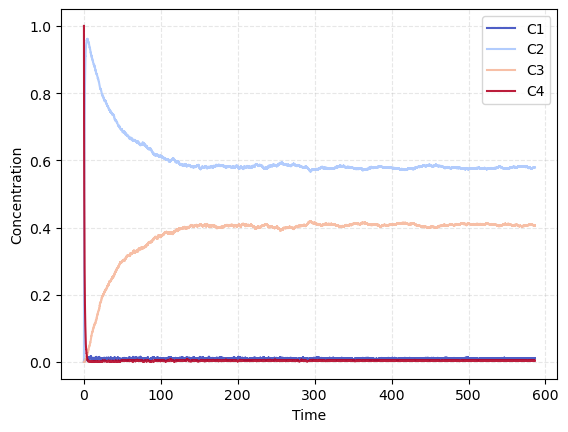

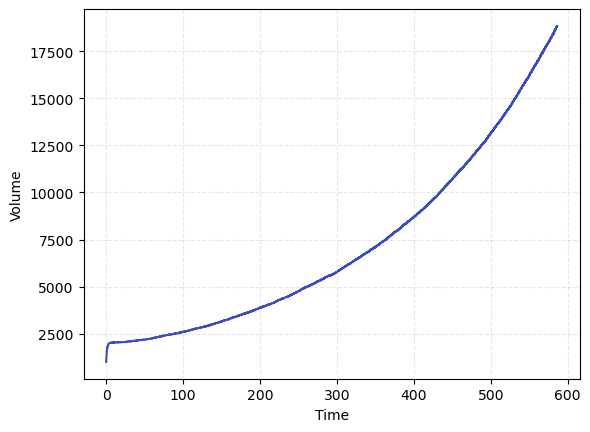

In [ ]:
# Reaction constants:
k = [1e-2]+[1,0,1,0,1,0]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,0,0,1000] # initial molecules number

# obtener reacciones y especies:
n_iterations= 100000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)

## Ejemplo 8

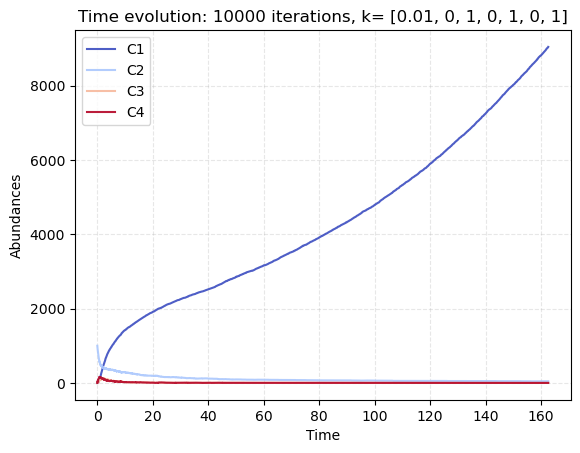

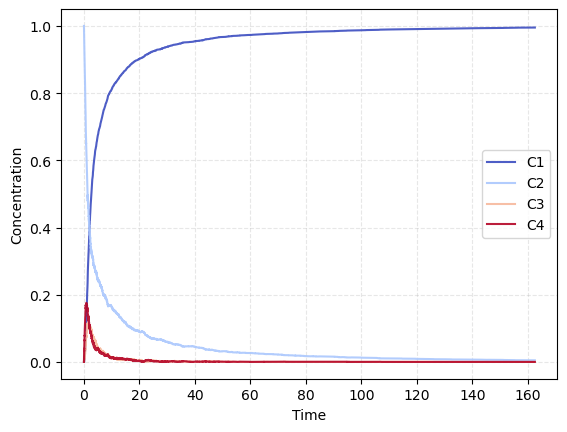

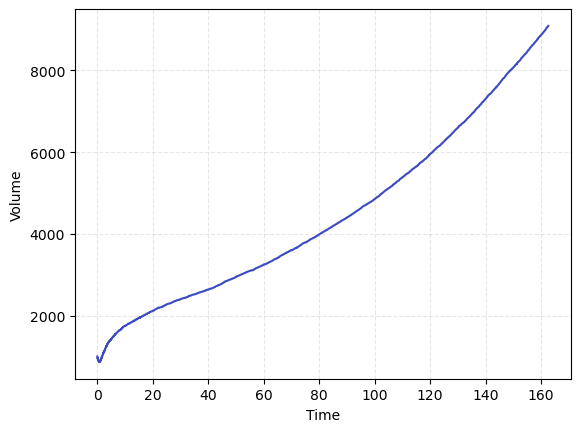

In [ ]:
# Reaction constants:
k = [1e-2]+[0,1,0,1,0,1]# len(k)= # de reacciones
# Volume:
V = 1000

# condiciones iniciales
initial_food = [0,1000,0,0] # initial molecules number

# obtener reacciones y especies:
n_iterations= 10000


abundances, times, V = chemistry(method, n_iterations, reactions,
                                initial_food, k, V)
abundances_times(times, abundances, species)
concentration_time(times, abundances, V, species)
volume_time(times, V)